# Описание проекта

**Цель проекта**


Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
1. Без подписки
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - Стоимость старта (начала поездки) — 50 рублей;
2. С подпиской Ultra
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.
 
 
 **Описание данных**
 
 
 Пользователи — users_go.csv

- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)

Поездки — rides_go.csv

- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

Подписки — subscriptions_go.csv

- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

**Цель иследования**

"Менеджеры хотят увеличить кол - во новых пользователей" для этого необходимо:

- Узнать тратят ли пользователи с подпиской больше времени на поездки;
- Будет ли выручка пользователей с подпиской выше чем выручка от пользователей без подписки
- Растояни которое преодалевают пользователи с подпиской

**Ход иследования**

1. Произведу чтение предоставленых данных
2. Посмотрю из чего состоят данные
3. По необходимости приведу данные к одному типу
4. Проверим аномальные данные
5. Присутствие пустых значений и дубликотов
6. Проведем анализ текущих данных и сделаем вывод
7. Проверим необходимы гипотезы
8. Сделаем общий вывод

## Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats as st

##  Загрузка данных

In [2]:
data_user = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subscription = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
print('Вывод данных о Пользователях')
display(data_user.head(2))
print('Вывод данных о Поездках')
display(data_rides.head(2))
print('Вывод данных о Подписках')
display(data_subscription.head(5))

Вывод данных о Пользователях


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra


Вывод данных о Поездках


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18


Вывод данных о Подписках


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [4]:
print('Вывод информации о Пользователях')
data_user.info()

Вывод информации о Пользователях
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
print('Вывод информации о Поездках')
data_rides.info()

Вывод информации о Поездках
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
print('Вывод информации о Подписках')
data_subscription.info()

Вывод информации о Подписках
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод**

- Для данных о Пользователях - 1565 строк

- Для данных о Поездках - 18064 строк
    - для колонки date необходимо изменить тип поля
    
- Для данных о Подписках - 2 строки


## Предобработка данных

###  Приведение к типу данных

In [7]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [8]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Проверка наличия аномалий в столбце date

In [9]:
print('Начальная дата выборки:', data_rides['date'].min())
print('Конечная дата выборки:',data_rides['date'].max())


Начальная дата выборки: 2021-01-01 00:00:00
Конечная дата выборки: 2021-12-30 00:00:00


### Добавление нового столбца

In [10]:
data_rides['month'] = data_rides['date'].dt.month
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


### Проверка на дубликаты

In [11]:
print('ДУБЛИ в данных о Пользователях:', data_user['user_id'].duplicated().sum())
print('ДУБЛИ в данных о Поездках:', data_rides.duplicated().sum())
print('ДУБЛИ в данных о Подписках:', data_subscription.duplicated().sum())


ДУБЛИ в данных о Пользователях: 31
ДУБЛИ в данных о Поездках: 0
ДУБЛИ в данных о Подписках: 0


In [12]:
data_user = data_user.drop_duplicates().reset_index(drop=True)
print('ДУБЛИ в данных о Пользователях:', data_user['user_id'].duplicated().sum())

ДУБЛИ в данных о Пользователях: 0


**Вывод**

На этапе предобработке данных были выполнены следующие действия:
- Для dataframe data_rides был изменени тип данных в колонке date
- Столбец date проверен на минимальное (2021-01-01) и максимальное (2021-12-30) значение, для исключения появления аномалий
- Добавлен новый столбец month обозначающий месяц
- Была выполнена проверка на дубли, все дубли из dataframe data_user были удалены

Некорректный тип данных для столбца, скорее всего возник по причине не корректно сформированной выгрузки.

Дубли могли возникнуть по причине сбоев работы системы или при выгрузке данных

## Исследовательский анализ данных

### Частота встречаемости городов

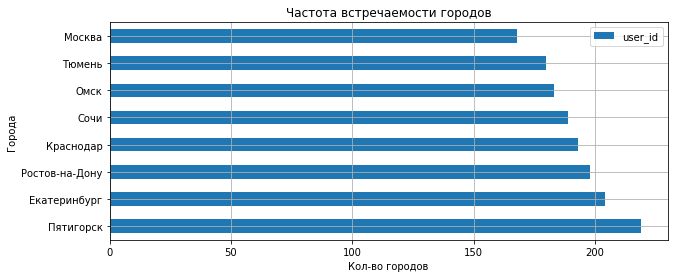

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

In [13]:
(data_user
 .pivot_table(index='city', values='user_id', aggfunc='count')
 .sort_values(by='user_id',ascending=False)
 .plot(grid=True,kind='barh', figsize=(10, 4))
)
plt.title('Частота встречаемости городов');
plt.ylabel('Города');
plt.xlabel('Кол-во городов');

plt.show()
data_user['city'].describe()

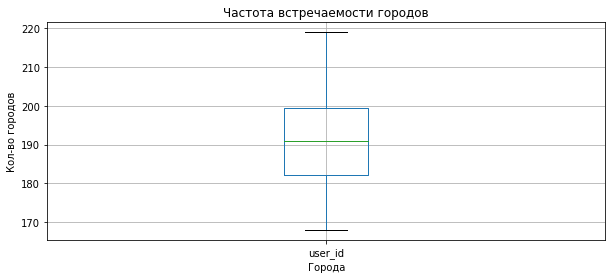

In [14]:
(data_user
 .pivot_table(index='city', values='user_id', aggfunc='count')
 .sort_values(by='user_id',ascending=False)
 .boxplot(grid=True, figsize=(10, 4))
)
plt.title('Частота встречаемости городов');
plt.xlabel('Города');
plt.ylabel('Кол-во городов');
plt.show()

**вывод**

    - Больше всего пользователей находится в городе Пятигорск
    - Меньше всего пользователей находится в городе Москва
    - Аномальных значений выходящих за пределы не присутствует

### Соотношение пользователей с подпиской и без подписки

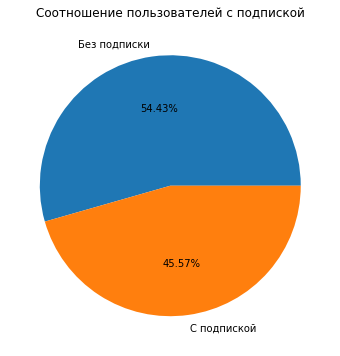

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

In [15]:
(data_user['subscription_type']
 .value_counts()
 .plot(kind='pie',labels=['Без подписки','С подпиской'],autopct="%0.2f%%", figsize=(8, 6))
)
plt.title('Соотношение пользователей с подпиской')
plt.ylabel('');

plt.show()
data_user['subscription_type'].describe()

**вывод**

    - Кол-во пользователей без подписки 54.43%
    - Кол- во пользователей с подпиской 45.57%

### Возраст пользователей

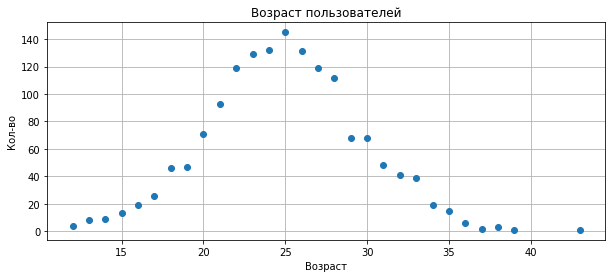

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [16]:
(data_user['age']
 .value_counts()
 .plot(grid=True,style='o', figsize=(10, 4))
)
plt.title('Возраст пользователей')
plt.ylabel('Кол-во')
plt.xlabel('Возраст')
plt.show()
data_user['age'].describe()

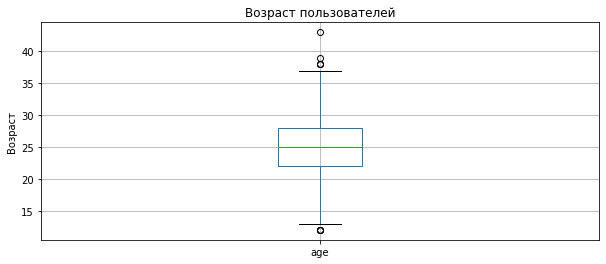

In [17]:
data_user.boxplot(column='age',grid=True, figsize=(10, 4))
plt.title('Возраст пользователей')
plt.ylabel('Возраст')
plt.xlabel('')
plt.show()

**вывод**

- Пользователей в [20 - 30] - больше остальных. Больше всего пользователей в возрасте 25 лет
- Есть пользователи с возростом более 37 лет, так же присутствуют пользователи возрастом менее 15 лет

### Расстояние, которое пользователь преодолел за одну поездку

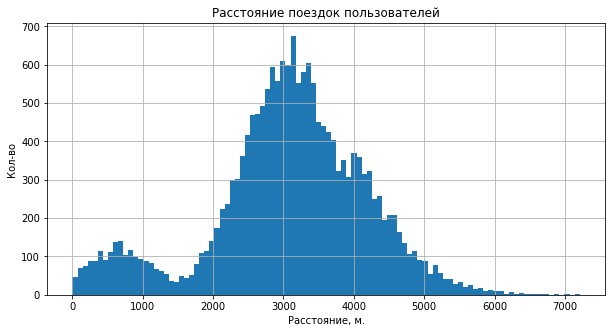

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [18]:
data_rides['distance'].hist(bins=100, figsize = (10,5))
plt.title('Расстояние поездок пользователей')
plt.ylabel('Кол-во')
plt.xlabel('Расстояние, м.')
plt.show()

data_rides['distance'].describe()

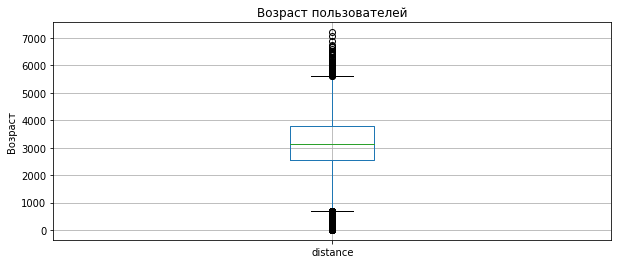

In [19]:
data_rides.boxplot(column='distance',grid=True, figsize=(10, 4))
plt.title('Возраст пользователей')
plt.ylabel('Возраст')
plt.xlabel('')
plt.show()


**вывод**

- Чаще всего пользователи арендуют технику для передвижения в промежутке [2.5 до 3.7] км
- Присутствуют значения выходящие за пределы графика [5.5] км, так же присутствуют аномально низкие значения [0.8]км

### Продолжительность поездок

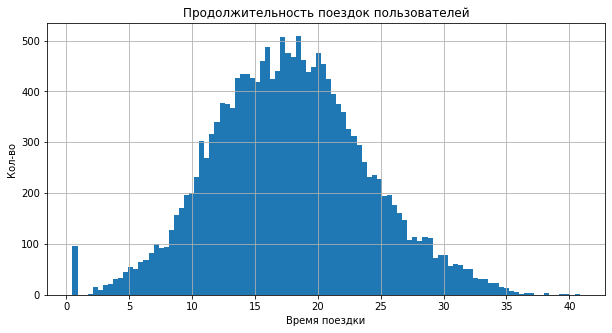

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [20]:
data_rides['duration'].hist(bins=100, figsize = (10,5))
plt.title('Продолжительность поездок пользователей')
plt.ylabel('Кол-во')
plt.xlabel('Время поездки')
plt.show()

data_rides['duration'].describe()

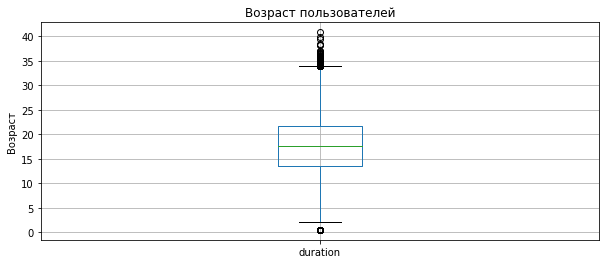

In [21]:
data_rides.boxplot(column='duration',grid=True, figsize=(10, 4))
plt.title('Возраст пользователей')
plt.ylabel('Возраст')
plt.xlabel('')
plt.show()

**вывод**
- Чаще всего пользователи арендуют технику в промежутке [13 - 21] минут
- Есть данные где аренда не продолжилась более 5 минут
- Есть значения где аренда продолжалась более 34 минут

**Вывод**
1. Частота встречаемости городов: 
    - Больше всего пользователей находится в городе Пятигорск
    - Меньше всего пользователей находится в городе Москва
2. Сравнение пользователей с подпиской и без 
    - Кол-во пользователей без подписки 54.43%
    - Кол- во пользователей с подпиской 45.57%
3. Пользователей в [20 - 30] - больше остальных. Больше всего пользователей в возрасте 25 лет
4. Чаще всего пользователи арендуют технику для передвижения в промежутке [2 до 4.5] км
5. Чаще всего пользователи арендуют технику в промежутке [10 - 25] минут


## Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм

Уточняем размер датасетов

In [22]:
display(data_user.describe())
print()
display(data_rides.describe())
print()
display(data_subscription.describe())


,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


In [23]:
summary_data = data_user.merge(data_rides, on='user_id', how='left')
summary_data = summary_data.merge(data_subscription, on='subscription_type', how='left')
display(summary_data.head(5))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [24]:
print('ДУБЛИ в данных о Пользователях:', summary_data.duplicated().sum())

ДУБЛИ в данных о Пользователях: 0


In [25]:
summary_data = summary_data.drop_duplicates().reset_index(drop=True)

In [26]:
print('Общие данные:')
summary_data.describe()

Общие данные:


,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,24.893071,3070.659976,17.805011,6.486772,7.280496,32.012398,71.590658
std,434.734317,4.582216,1116.831209,6.091051,3.437410,0.959882,23.997045,95.508238
min,1.000000,12.000000,0.855683,0.500000,1.000000,6.000000,0.000000,0.000000
25%,487.000000,22.000000,2543.226360,13.597563,4.000000,6.000000,0.000000,0.000000
50%,889.000000,25.000000,3133.609994,17.678395,6.000000,8.000000,50.000000,0.000000
75%,1213.250000,28.000000,3776.222735,21.724800,9.000000,8.000000,50.000000,199.000000
max,1534.000000,43.000000,7211.007745,40.823963,12.000000,8.000000,50.000000,199.000000


**Вывод**

1. Произвели объединение таблиц в одну
2. По результатам объединения появились дубликаты
3. Произвели удаление дубликатов

### Создадим два датафрейма

#### Пользователи без подписки

In [27]:
user_not_subscription = summary_data.loc[summary_data['subscription_type'] == 'free']
user_not_subscription.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


#### Пользователи с подпиской

In [28]:
user_is_a_subscription = summary_data.loc[summary_data['subscription_type'] == 'ultra']
user_is_a_subscription.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

#### Расстояние и продолжительность которое пользователи преодолели за поездку (пользователи без подписки)

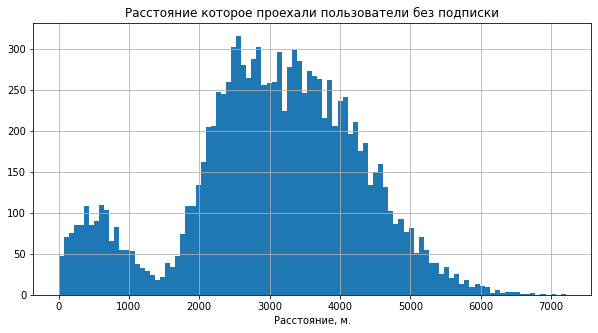

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [29]:
user_not_subscription['distance'].hist(bins=100, figsize = (10,5))
plt.title('Расстояние которое проехали пользователи без подписки');
plt.xlabel('Расстояние, м.');
plt.show()

user_not_subscription['distance'].describe()

**Вывод**

- Пользователи без подписки в среднем проезжают 3 км
- Максимальное значение которое проехали пользователи это 7.2 км
- Минимальное 0.9 км

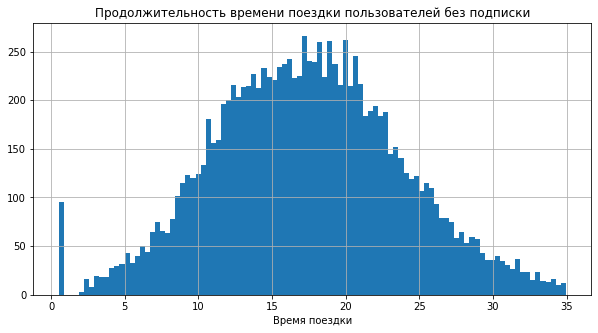

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [30]:
user_not_subscription['duration'].hist(bins=100, figsize = (10,5))
plt.title('Продолжительность времени поездки пользователей без подписки');
plt.xlabel('Время поездки');
plt.show()

user_not_subscription['duration'].describe()

**Вывод**

- Пользователи без подписки в среднем проезжают арендуют на 17 минут
- Максимальное значение аренды 35 минут
- Минимальное 0.5 минуты

#### Расстояние и продолжительность которое пользователи преодолели за поездку (пользователи с подпиской)

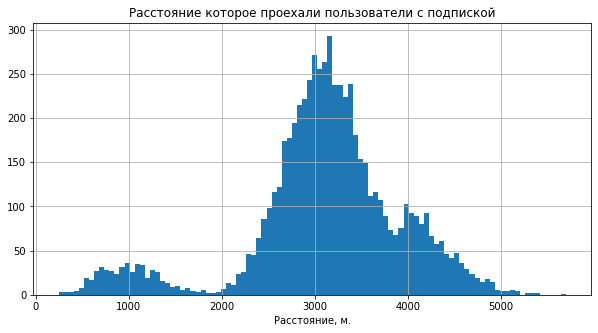

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [31]:
user_is_a_subscription['distance'].hist(bins=100, figsize = (10,5))
plt.title('Расстояние которое проехали пользователи с подпиской');
plt.xlabel('Расстояние, м.');
plt.show()

user_is_a_subscription['distance'].describe()

**Вывод**

- Пользователи с подпиской в среднем проезжают 3 км
- Максимальное значение которое проехали пользователи это 5.6 км
- Минимальное 0.2 км

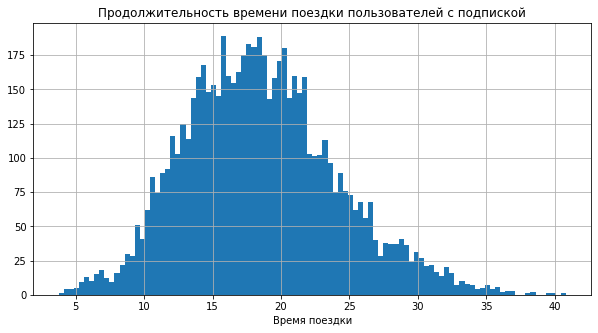

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [32]:
user_is_a_subscription['duration'].hist(bins=100, figsize = (10,5))
plt.title('Продолжительность времени поездки пользователей с подпиской');
plt.xlabel('Время поездки');
plt.show()

user_is_a_subscription['duration'].describe()

**Вывод**

- Пользователи с подпиской в среднем проезжают 18 минут
- Максимальное значение которое проехали пользователи это 40.8 минут
- Минимальное 3.7 минуты

**Вывод**
1. Большая часть кол-ва пользователей без подписки проезжает растояние в промежутке [2.1 - 4]км, когда пользователи с подпиской 3.2 км
2. Чаще всего пользователи без подписки арендуют в промежутке [12 - 22] минут, когда пользователи с подпиской арендуют в промежутке [14 - 21] минута

## Подсчёт выручки

### Создаем датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4

In [33]:
data_pivot = summary_data.pivot_table(index=['user_id', 'month'], 
                  values=['distance', 'duration', 'name', 'subscription_type'], 
                  aggfunc={'distance':'sum', 'duration':'sum', 'name':'count', 'subscription_type': 'min'})
data_pivot.columns = ['total_distance', 'total_duration', 'trip_count', 'subscription_type']
data_pivot['total_duration'] = round(data_pivot['total_duration'], 0)

display(data_pivot)

total_distance  total_duration  trip_count subscription_type
user_id month                                                              
1       1         7027.511294            41.0           2             ultra
        4          754.159807             6.0           1             ultra
        8         6723.470560            45.0           2             ultra
        10        5809.911100            32.0           2             ultra
        11        7003.499363            53.0           3             ultra
...                       ...             ...         ...               ...
1534    6         3409.468534            25.0           2              free
        8         7622.453034            47.0           2              free
        9         4928.173852            23.0           1              free
        11       13350.015305            76.0           4              free
        12        2371.711192            16.0           1              free

[11331 rows x 4 columns]

In [34]:
data_pivot.isna().sum()

total_distance       0
total_duration       0
trip_count           0
subscription_type    0
dtype: int64

**Вывод**

- Произвели построение сводной таблицы
- Проеизвели проверку на пропуски в созданной таблице

### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь.

In [35]:
data_pivot['total_duration'] = round(data_pivot['total_duration'])

In [36]:
def money(row):
    total_distance = row['total_distance']
    total_duration = row['total_duration']
    trip_count = row['trip_count']
    subscription_type = row['subscription_type']
    
    if subscription_type == 'ultra':
        return total_duration * 6 + 199
    if subscription_type == 'free':
        return total_duration * 8 + trip_count * 50



data_pivot['money_user'] = data_pivot.apply(money, axis=1)
display(data_pivot)

total_distance  total_duration  trip_count subscription_type  \
user_id month                                                                 
1       1         7027.511294            41.0           2             ultra   
        4          754.159807             6.0           1             ultra   
        8         6723.470560            45.0           2             ultra   
        10        5809.911100            32.0           2             ultra   
        11        7003.499363            53.0           3             ultra   
...                       ...             ...         ...               ...   
1534    6         3409.468534            25.0           2              free   
        8         7622.453034            47.0           2              free   
        9         4928.173852            23.0           1              free   
        11       13350.015305            76.0           4              free   
        12        2371.711192            16.0           1              free   

               money_user  
user_id month              
1       1           445.0  
        4           235.0  
        8           469.0  
        10          391.0  
        11          517.0  
...                   ...  
1534    6           300.0  
        8           476.0  
        9           234.0  
        11          808.0  
        12          178.0  

[11331 rows x 5 columns]

**Вывод**

- Произвели округление времени каждой поездки
- Добавили столбец с помесечной выручкой

## Проверка гипотез

### Гипотеза 1: Тратят ли пользователи с подпиской больше времени на поездки

In [37]:
user_is_a_subscription['duration'] = round(user_is_a_subscription['duration'])

/tmp/ipykernel_906/1231748515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_is_a_subscription['duration'] = round(user_is_a_subscription['duration'])


In [38]:
alpha = 0.05

results = st.ttest_ind(user_is_a_subscription['duration'], user_not_subscription['duration'], alternative = 'greater')
print('p = ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print()    
print('Средняя продолжительность аренды техники пользователями с подпиской:', 
      round(user_is_a_subscription['duration'].mean(), 2)) 
print('Средняя продолжительность аренды техники пользователями без подписки:', 
      round(user_not_subscription['duration'].mean(), 2))

rent = round(round(user_is_a_subscription['duration'].mean(), 2) - round(user_not_subscription['duration'].mean(), 2), 2)
print()

print(f'Пользователи с подпиской арендуют технику на {rent} минут больше, чем пользователи без подписки')

p =  5.120625508061543e-35
Отвергаем нулевую гипотезу

Средняя продолжительность аренды техники пользователями с подпиской: 18.55
Средняя продолжительность аренды техники пользователями без подписки: 17.39

Пользователи с подпиской арендуют технику на 1.16 минут больше, чем пользователи без подписки


### Гипотеза 2: Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

In [39]:
optimal = 3130

results = st.ttest_1samp(
    user_is_a_subscription['distance'],
    optimal,
    alternative='greater')

print('p = ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 
    
print()
print('Пользователи с подпиской проезжают', round(user_is_a_subscription['distance'].mean(),2), 'метров')

p =  0.9195368847849785
Не отвергаем нулевую гипотезу

Пользователи с подпиской проезжают 3115.45 метров


### Гипотеза 3: Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [40]:
subscription_ultra = data_pivot.query('subscription_type == "ultra"')
subscription_free = data_pivot.query('subscription_type == "free"')

results = st.ttest_ind(subscription_ultra['money_user'],
                       subscription_free['money_user'],
                       equal_var=False, alternative = 'greater')

print('p = ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print()
print('В среднем в месяц пользователи с подпиской тратят на аренду самокатов', 
      round(subscription_ultra['money_user'].mean(), 2))
print()
print('Средняя продолжительность аренды техники пользователями без подписки:',
      round(subscription_free['money_user'].mean(), 2))
print()
res = round(round(subscription_ultra['money_user'].mean(), 2) - round(subscription_free['money_user'].mean(),2),2)
print(f'Пользователи с подпиской тратят на {res} руб больше, чем пользователи без подписки')


p =  2.3492186178087955e-47
Отвергаем нулевую гипотезу

В среднем в месяц пользователи с подпиской тратят на аренду самокатов 358.54

Средняя продолжительность аренды техники пользователями без подписки: 321.78

Пользователи с подпиской тратят на 36.76 руб больше, чем пользователи без подписки


### Гипотеза 4

Для решения подобной задачи подойдет проверка гипотезы о равенстве средних для зависимых выборок, так как исходный датафрейм не изменился. Решить задачу можно методом scipy.stats.ttest_rel()

# Вывод

**Предобработка данных:**
1. Данные в датасет подготовлены хорошо, нет пустых или нулевых значений
2. Выполнили приведение к единому типу столбец date
3. Была выполнена проверка на дубли, в файле `users_go` были обнаружены дубли. Скорее всего возникли при сбое в работе системы

**Исследовательский анализ данных**
1. Частота встречаемости городов: 
    - Больше всего пользователей находится в городе Пятигорск
    - Меньше всего пользователей находится в городе Москва
2. Сравнение пользователей с подпиской и без 
    - Кол-во пользователей без подписки 54.43%
    - Кол- во пользователей с подпиской 45.57%
3. Пользователей в [20 - 30] - больше остальных. Больше всего пользователей в возрасте 25 лет
4. Чаще всего пользователи арендуют технику для передвижения в промежутке [2 до 4.5] км
5. Чаще всего пользователи арендуют технику в промежутке [10 - 25] минут

**Объединение данных**

1. Большая часть кол-ва пользователей без подписки проезжает растояние в промежутке [2.1 - 4]км, когда пользователи с подпиской 3.2 км
2. Чаще всего пользователи без подписки арендуют в промежутке [12 - 22] минут, когда пользователи с подпиской арендуют в промежутке [14 - 21] минута

**Проверка гипотез**

- Гипотеза 1 Пользователю у которых есть подписка арендуют технику больше всего на 1 минуту
- Гипотеза 2 Пользователи с подпиской проезжают 3115.45 метров
- Гипотеза 3 Пользователи с подпиской тратят на 36.76 руб больше, чем пользователи без подписки



**Итог**

1. Пользователей без подписки в текущей ситуации 11568 когда с подпиской 6500:
    1.1 Для превлечения новых пользователей необходимо дополнительно провести анализ:
        - Как часто пользователи продлевают подписку
        - Какое событие влияет на продление подписки 
        
        Если на подключение к подписке новых пользователей влияет акция посмотреть влияние акций на подписки
        
    1.2 Посмотреть в разрезе подписчиков какое кол-во людей продлевают на постоянной основе, какое кол- во от акции к акции. На основании можно предложить реализовать программу по удержанию пользователей как можно дольше
    
2. Провести опоросы пользователей с подпиской и без подписки:

     - Для пользователей с подпиской - чем им нравится использование подписки 
     - Для пользователей без подписки - что бы они хотели улучшить 
     
3. Провести аналитику в разрезе пользователей которые не используют и используют подписку:

    - Для тех кто используют подписку - вывести сторис с суммой всего растояния которое приодолел юсер, количества раз использования, суммы экономия в месяц; `При условии если сумма экономии в месяц > суммы подписки`
    
    - Для тех кто не использует подписку - вывести сторис с суммой всего растояния которое приодолел юсер, количества раз использования, суммы возможного экономия в месяц при использовании подписки; `При условии если сумма экономии в месяц > суммы подписки`
    
4. Подумать о необходимости внедрения акции для привлечения пользователей использовать подписку, возможно стоит рассмотреть другие варианты использования, так разница выручки не значительно великая и можно разработать условия без подписки.

К примеру: 

- Сконцентрироваться на привлечении пользователей использовать сервис аренды техники вне зависимости от подписки. 